In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
train_data = pd.read_csv('Dataset/train_data.csv')

In [4]:
train_data.head()

,AssetTypeID,YearsAfterInstallation,Spend_ExGST
0,6,23,1321.699184
1,238,10,1041.849316
2,91,20,771.256974
3,172,19,89.591109
4,103,5,1116.938657


In [6]:
X = train_data[['AssetTypeID', 'YearsAfterInstallation']]
y = train_data['Spend_ExGST']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 1469878.8883936736


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

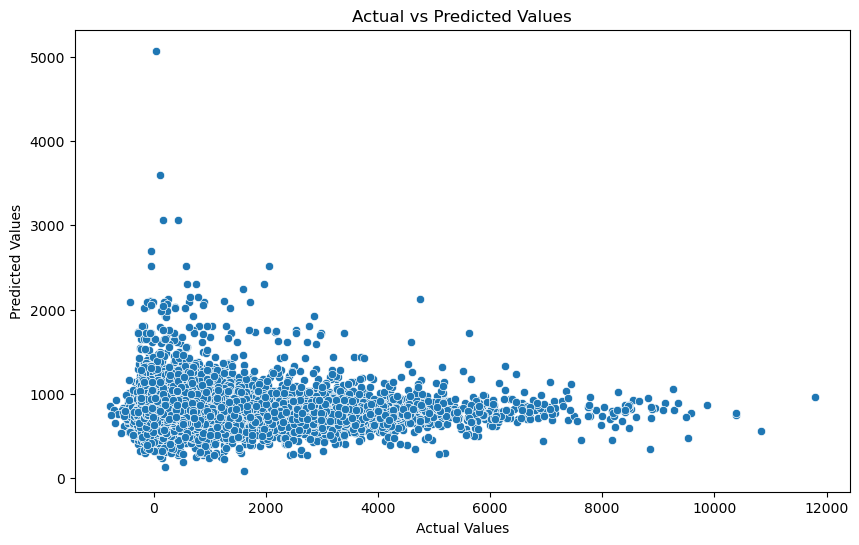

In [13]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

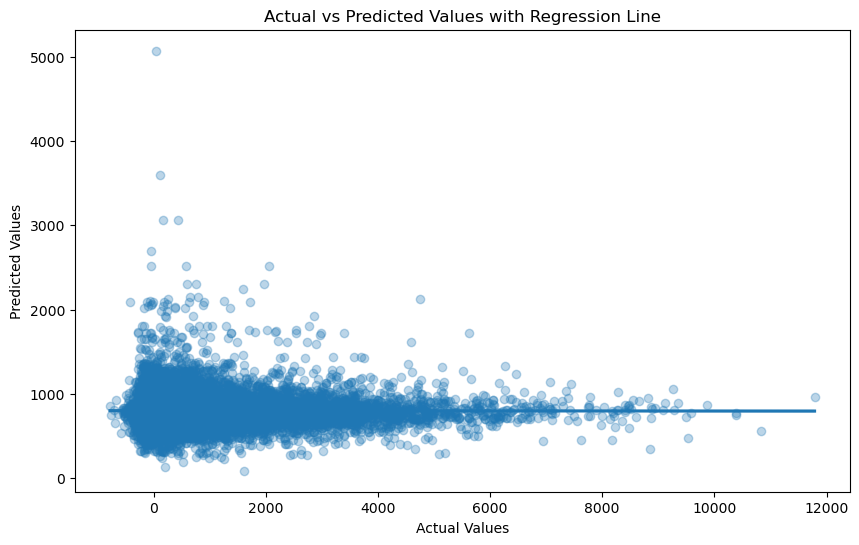

In [14]:
# Optionally, you can plot a regression line for comparison
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=results, scatter_kws={'alpha':0.3})
plt.title('Actual vs Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [16]:
!pip install catboost

     -------------------------------------- 101.1/101.1 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00


In [17]:
from catboost import CatBoostRegressor
import numpy as np

In [18]:
cat_model = CatBoostRegressor(iterations=10, depth=6, learning_rate=0.1, loss_function='RMSE', random_seed=42)
cat_model.fit(X_train, y_train, cat_features=['AssetTypeID','YearsAfterInstallation'])

0:	learn: 1198.8485895	total: 245ms	remaining: 2.2s
1:	learn: 1198.8477196	total: 276ms	remaining: 1.1s
2:	learn: 1198.8029665	total: 328ms	remaining: 765ms
3:	learn: 1198.7480067	total: 378ms	remaining: 567ms
4:	learn: 1198.7092583	total: 426ms	remaining: 426ms
5:	learn: 1198.6935065	total: 460ms	remaining: 306ms
6:	learn: 1198.6688988	total: 526ms	remaining: 225ms
7:	learn: 1198.6335923	total: 571ms	remaining: 143ms
8:	learn: 1198.5970964	total: 617ms	remaining: 68.5ms
9:	learn: 1198.5776491	total: 664ms	remaining: 0us


In [19]:
y_pred_cat = cat_model.predict(X_test)

In [20]:
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
print(f'Root Mean Squared Error on Test Set (CatBoost): {rmse_cat}')

Root Mean Squared Error on Test Set (CatBoost): 1200.7667842127396


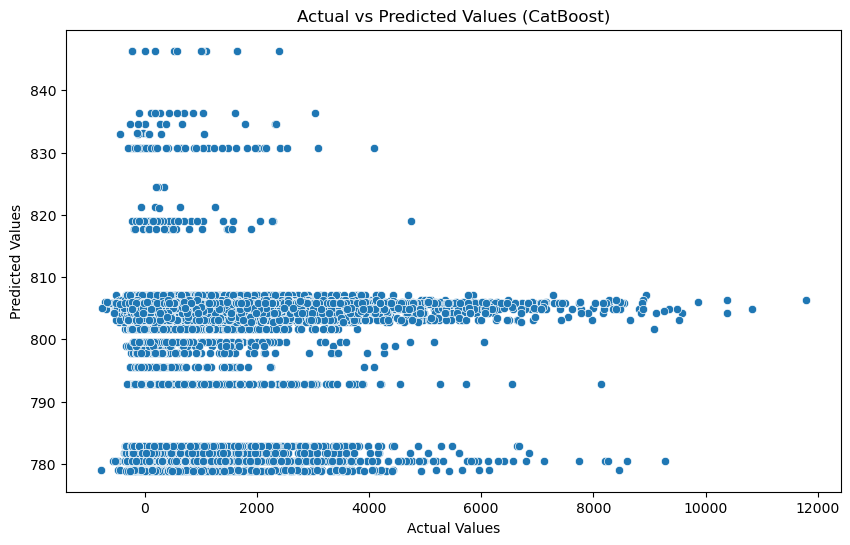

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_cat)
plt.title('Actual vs Predicted Values (CatBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [22]:
cat_model2 = CatBoostRegressor(iterations=200, depth=6, learning_rate=0.1, loss_function='RMSE', random_seed=42)
cat_model2.fit(X_train, y_train, cat_features=['AssetTypeID','YearsAfterInstallation'])

0:	learn: 1198.8396761	total: 40.6ms	remaining: 8.09s
1:	learn: 1198.8079543	total: 91.7ms	remaining: 9.08s
2:	learn: 1198.7861451	total: 137ms	remaining: 8.97s
3:	learn: 1198.7502004	total: 181ms	remaining: 8.87s
4:	learn: 1198.7104125	total: 225ms	remaining: 8.79s
5:	learn: 1198.6721330	total: 272ms	remaining: 8.79s
6:	learn: 1198.6331976	total: 318ms	remaining: 8.76s
7:	learn: 1198.6096625	total: 363ms	remaining: 8.7s
8:	learn: 1198.5899448	total: 408ms	remaining: 8.66s
9:	learn: 1198.5812887	total: 440ms	remaining: 8.35s
10:	learn: 1198.5546089	total: 487ms	remaining: 8.37s
11:	learn: 1198.5178967	total: 533ms	remaining: 8.34s
12:	learn: 1198.4855019	total: 580ms	remaining: 8.34s
13:	learn: 1198.4744787	total: 625ms	remaining: 8.3s
14:	learn: 1198.4382526	total: 669ms	remaining: 8.25s
15:	learn: 1198.4075509	total: 715ms	remaining: 8.23s
16:	learn: 1198.3825532	total: 762ms	remaining: 8.2s
17:	learn: 1198.3643316	total: 806ms	remaining: 8.15s
18:	learn: 1198.3641139	total: 824ms	re

153:	learn: 1196.3749301	total: 7.06s	remaining: 2.11s
154:	learn: 1196.3707146	total: 7.11s	remaining: 2.06s
155:	learn: 1196.3605243	total: 7.15s	remaining: 2.02s
156:	learn: 1196.3416083	total: 7.2s	remaining: 1.97s
157:	learn: 1196.3237965	total: 7.24s	remaining: 1.93s
158:	learn: 1196.3090635	total: 7.29s	remaining: 1.88s
159:	learn: 1196.2983742	total: 7.34s	remaining: 1.83s
160:	learn: 1196.2963618	total: 7.38s	remaining: 1.79s
161:	learn: 1196.2834593	total: 7.43s	remaining: 1.74s
162:	learn: 1196.2692622	total: 7.47s	remaining: 1.7s
163:	learn: 1196.2465022	total: 7.52s	remaining: 1.65s
164:	learn: 1196.2397585	total: 7.57s	remaining: 1.6s
165:	learn: 1196.2371459	total: 7.61s	remaining: 1.56s
166:	learn: 1196.1998612	total: 7.65s	remaining: 1.51s
167:	learn: 1196.1789299	total: 7.7s	remaining: 1.47s
168:	learn: 1196.1550889	total: 7.74s	remaining: 1.42s
169:	learn: 1196.1486449	total: 7.79s	remaining: 1.37s
170:	learn: 1196.1365784	total: 7.84s	remaining: 1.33s
171:	learn: 11

In [23]:
y_pred_cat2 = cat_model2.predict(X_test)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat2))
print(f'Root Mean Squared Error on Test Set (CatBoost): {rmse_cat}')

Root Mean Squared Error on Test Set (CatBoost): 1201.0601792566272


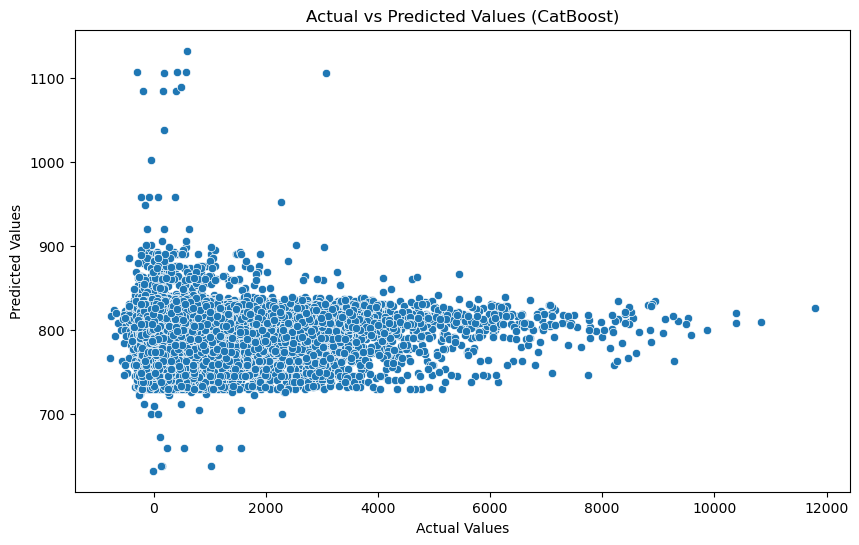

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_cat2)
plt.title('Actual vs Predicted Values (CatBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [25]:
print(train_data['Spend_ExGST'].describe())

count    100000.000000
mean        801.378990
std        1199.265569
min        -978.683690
25%          29.494480
50%         391.638201
75%        1107.345979
max       11812.030380
Name: Spend_ExGST, dtype: float64


In [26]:
range_spend_exgst = train_data['Spend_ExGST'].max() - train_data['Spend_ExGST'].min()
relative_rmse = rmse_cat / range_spend_exgst

print(f'Relative RMSE: {relative_rmse:.4f}')

Relative RMSE: 0.0939


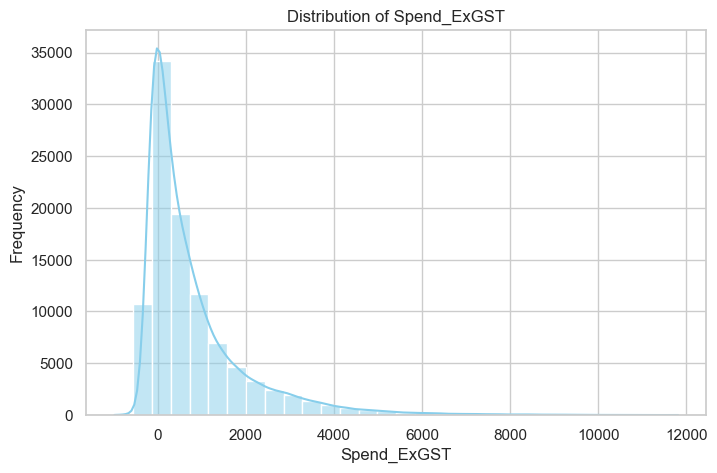

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_data' is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plotting a histogram
sns.histplot(train_data['Spend_ExGST'], bins=30, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('Spend_ExGST')
plt.ylabel('Frequency')
plt.title('Distribution of Spend_ExGST')

# Show the plot
plt.show()

In [5]:
df = pd.read_csv('Dataset/yearRecord.csv')

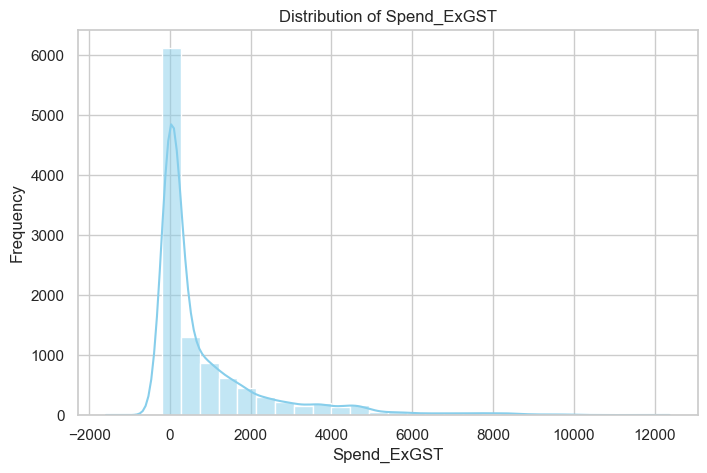

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plotting a histogram
sns.histplot(df['Spend_ExGST'], bins=30, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('Spend_ExGST')
plt.ylabel('Frequency')
plt.title('Distribution of Spend_ExGST')

# Show the plot
plt.show()

In [7]:
df =df[df['Spend_ExGST']>0]

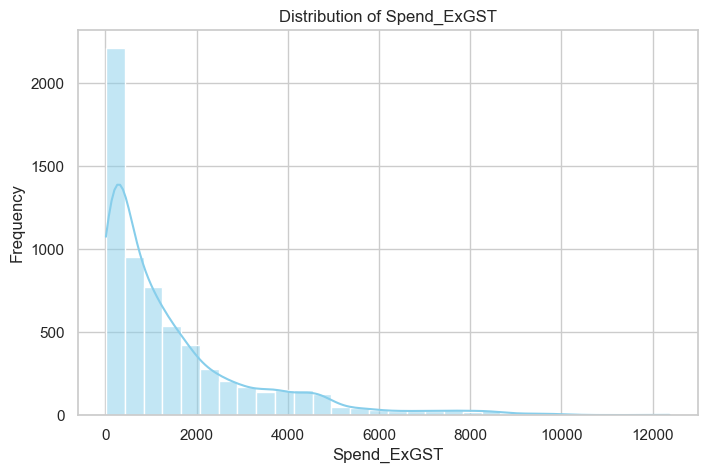

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plotting a histogram
sns.histplot(df['Spend_ExGST'], bins=30, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('Spend_ExGST')
plt.ylabel('Frequency')
plt.title('Distribution of Spend_ExGST')

# Show the plot
plt.show()

In [9]:
import numpy as np

In [11]:
df['log_Spend'] = np.log1p(df['Spend_ExGST'])

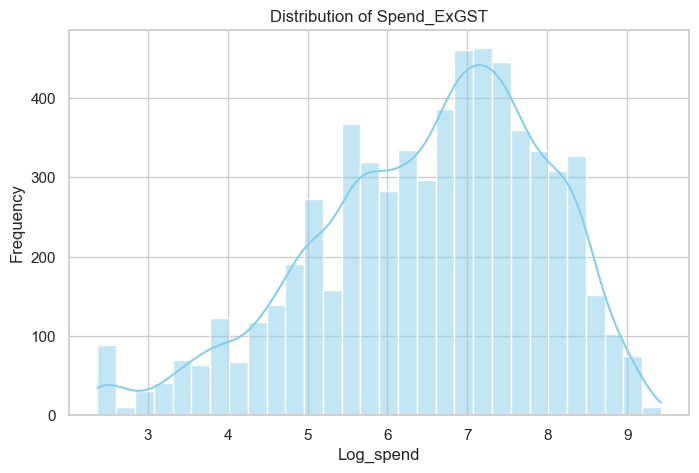

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plotting a histogram
sns.histplot(df['log_Spend'], bins=30, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('Log_spend')
plt.ylabel('Frequency')
plt.title('Distribution of Spend_ExGST')

# Show the plot
plt.show()

In [14]:
train_data['log_spend'] = np.log1p(train_data['Spend_ExGST'])

C:\ML\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
train_data=train_data[train_data['Spend_ExGST']>=0]

In [16]:
train_data['log_spend'] = np.log1p(train_data['Spend_ExGST'])

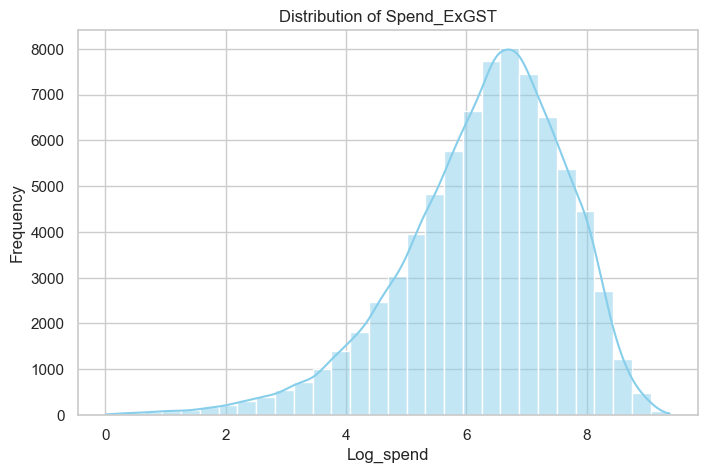

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plotting a histogram
sns.histplot(train_data['log_spend'], bins=30, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('Log_spend')
plt.ylabel('Frequency')
plt.title('Distribution of Spend_ExGST')

# Show the plot
plt.show()

In [20]:
X = train_data[['AssetTypeID','YearsAfterInstallation']]
y = train_data['log_spend']

In [21]:
X

,AssetTypeID,YearsAfterInstallation
0,6,23
1,238,10
2,91,20
3,172,19
4,103,5
...,...,...
99993,259,16
99994,363,6
99995,15,10
99996,6,17


In [22]:
y

0        7.187430
1        6.949712
2        6.649317
3        4.506356
4        7.019242
           ...   
99993    6.938783
99994    6.371955
99995    7.091778
99996    6.841576
99999    4.316112
Name: log_spend, Length: 77656, dtype: float64

In [23]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from catboost import CatBoostRegressor

In [27]:
cat_log = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', random_seed=42)
cat_log.fit(X_train_log, y_train_log, cat_features=['AssetTypeID','YearsAfterInstallation'])

0:	learn: 1.3608685	total: 44ms	remaining: 4.35s
1:	learn: 1.3608008	total: 85.7ms	remaining: 4.2s
2:	learn: 1.3607584	total: 127ms	remaining: 4.09s
3:	learn: 1.3607541	total: 143ms	remaining: 3.43s
4:	learn: 1.3607137	total: 185ms	remaining: 3.51s
5:	learn: 1.3606660	total: 226ms	remaining: 3.54s
6:	learn: 1.3606415	total: 268ms	remaining: 3.56s
7:	learn: 1.3606020	total: 309ms	remaining: 3.56s
8:	learn: 1.3605990	total: 325ms	remaining: 3.29s
9:	learn: 1.3605444	total: 366ms	remaining: 3.3s
10:	learn: 1.3605090	total: 409ms	remaining: 3.31s
11:	learn: 1.3604847	total: 450ms	remaining: 3.3s
12:	learn: 1.3604258	total: 493ms	remaining: 3.3s
13:	learn: 1.3604018	total: 534ms	remaining: 3.28s
14:	learn: 1.3603982	total: 556ms	remaining: 3.15s
15:	learn: 1.3603717	total: 614ms	remaining: 3.22s
16:	learn: 1.3603318	total: 656ms	remaining: 3.2s
17:	learn: 1.3603142	total: 708ms	remaining: 3.22s
18:	learn: 1.3602723	total: 750ms	remaining: 3.19s
19:	learn: 1.3602358	total: 791ms	remaining: 3

In [28]:
y_pred_log = cat_log.predict(X_test_log)
rmse_cat_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
print(f'Root Mean Squared Error on Test Set (CatBoost): {rmse_cat_log}')

Root Mean Squared Error on Test Set (CatBoost): 1.3409802740192853


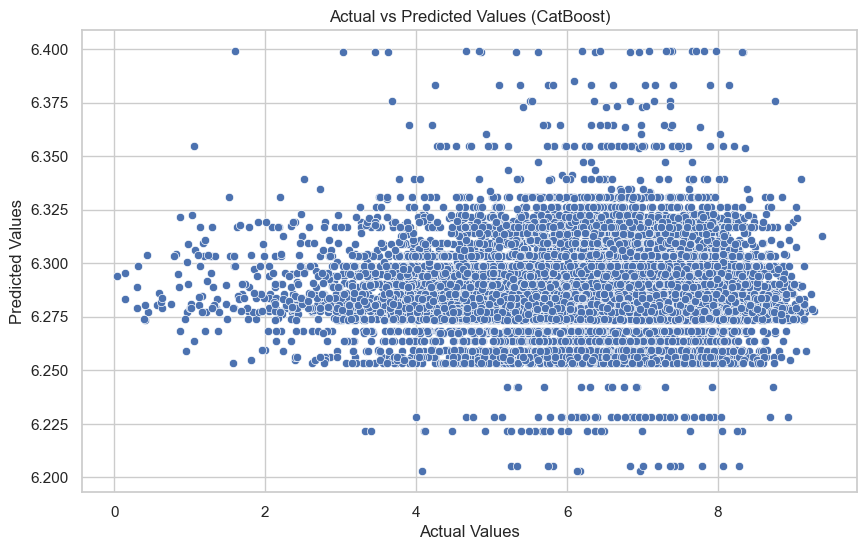

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_log, y=y_pred_log)
plt.title('Actual vs Predicted Values (CatBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_log, y_train_log)

RandomForestRegressor(random_state=42)

In [34]:
y_pred_logrf = rf_model.predict(X_test_log)

# Evaluate the model
rmse = mean_squared_error(y_test_log, y_pred_logrf, squared=False)
r2 = r2_score(y_test_log, y_pred_logrf)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 1.40
R-squared: -0.10


C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


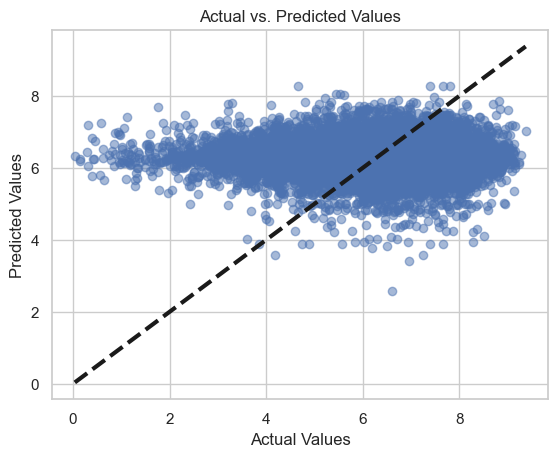

In [35]:
plt.scatter(y_test_log, y_pred_logrf, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'k--', lw=3)
plt.show()

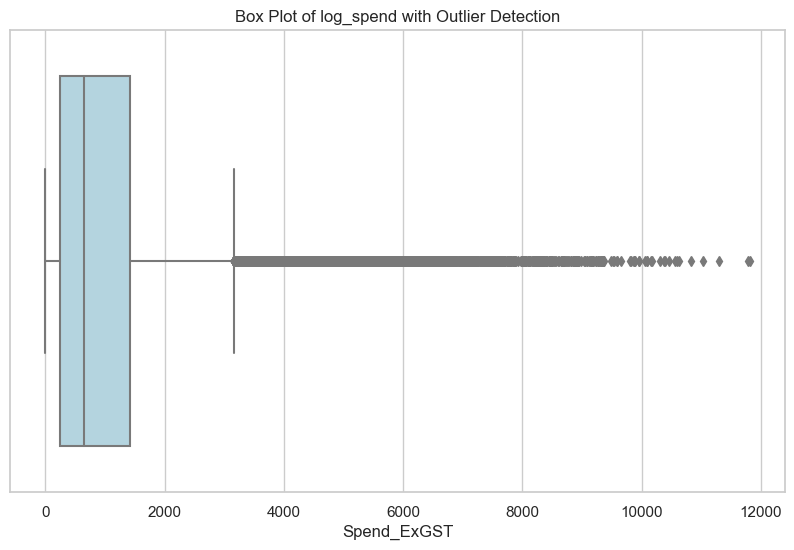

In [38]:
plt.figure(figsize=(10, 6))

# Create a box plot with outliers shown
sns.boxplot(x='Spend_ExGST', data=train_data, showfliers=True, color='lightblue')

# Set plot labels and title
plt.xlabel('Spend_ExGST')
plt.title('Box Plot of log_spend with Outlier Detection')

# Show the plot
plt.show()

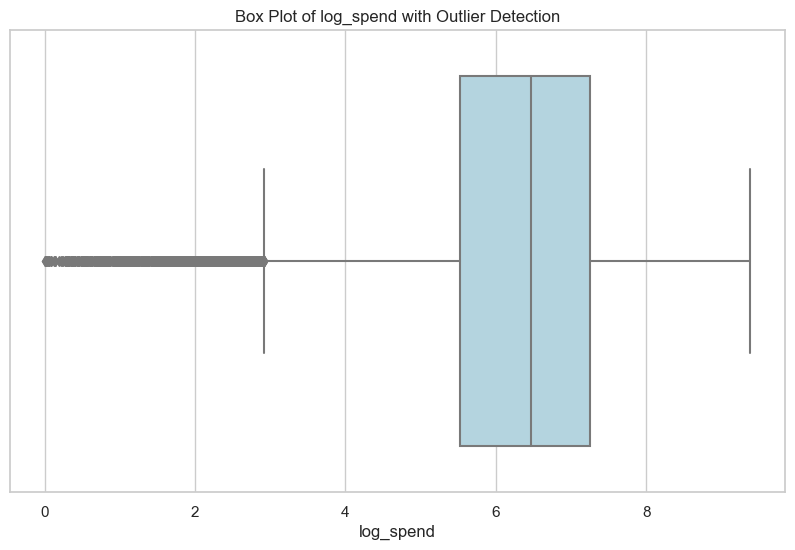

In [39]:
plt.figure(figsize=(10, 6))

# Create a box plot with outliers shown
sns.boxplot(x='log_spend', data=train_data, showfliers=True, color='lightblue')

# Set plot labels and title
plt.xlabel('log_spend')
plt.title('Box Plot of log_spend with Outlier Detection')

# Show the plot
plt.show()

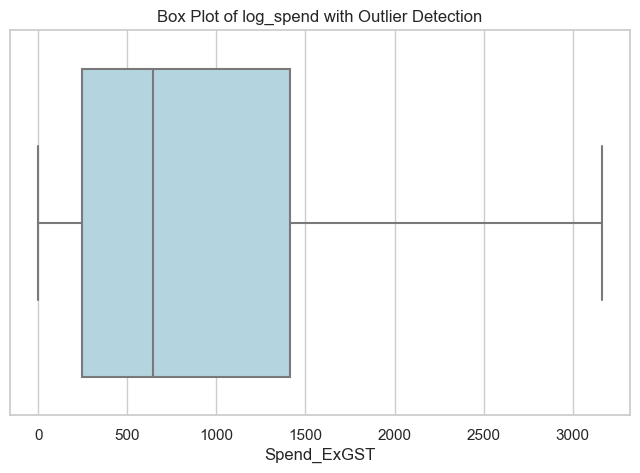

In [42]:
plt.figure(figsize=(8, 5))

# Create a box plot with outliers shown
sns.boxplot(x='Spend_ExGST', data=train_data, showfliers=False, color='lightblue')

# Set plot labels and title
plt.xlabel('Spend_ExGST')
plt.title('Box Plot of log_spend with Outlier Detection')

# Show the plot
plt.show()

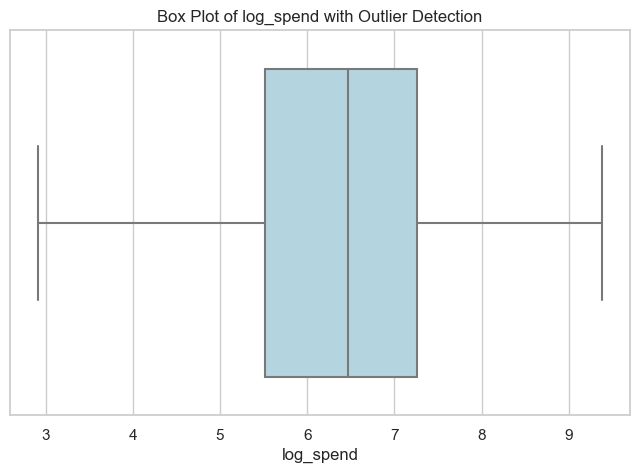

In [43]:
plt.figure(figsize=(8, 5))

# Create a box plot with outliers shown
sns.boxplot(x='log_spend', data=train_data, showfliers=False, color='lightblue')

# Set plot labels and title
plt.xlabel('log_spend')
plt.title('Box Plot of log_spend with Outlier Detection')

# Show the plot
plt.show()